# Global mass and energy conservation residuals

In [1]:
import os
import sys
import xarray as xr
import numpy as np

In [2]:
sys.path.insert(0, os.path.realpath('../libs/'))
from physics_utils import grid_area, pressure_integral, weighted_sum

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
IND_max = 65744
INDs = np.arange(0, IND_max+501, 501)
INDs[-1] = IND_max

base_dir = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/'

fn_mass_mlevel = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_mass_residual_1deg_mlevel_{:05d}_{:05d}.nc'
fn_water_mlevel = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_water_residual_1deg_mlevel_{:05d}_{:05d}.nc'
fn_energy_mlevel = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_energy_residual_1deg_mlevel_{:05d}_{:05d}.nc'

fn_mass_025_full = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_mass_residual_025_full_{:05d}_{:05d}.nc'
fn_water_025_full = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_water_residual_025_full_{:05d}_{:05d}.nc'
fn_energy_025_full = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_energy_residual_025_full_{:05d}_{:05d}.nc'

fn_mass_full = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_mass_residual_1deg_full_{:05d}_{:05d}.nc'
fn_water_full = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_water_residual_1deg_full_{:05d}_{:05d}.nc'
fn_energy_full = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_energy_residual_1deg_full_{:05d}_{:05d}.nc'

fn_mass_approx = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_mass_residual_1deg_approx_{:05d}_{:05d}.nc'
fn_water_approx = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_water_residual_1deg_approx_{:05d}_{:05d}.nc'
fn_energy_approx = '/glade/derecho/scratch/ksha/CREDIT/VERIF/verif_6h/ERA5_clim/ERA5_energy_residual_1deg_approx_{:05d}_{:05d}.nc'

In [5]:
# ================================================================= #
# mlevel full
collect_mass_residual = []
collect_water_residual = []
collect_energy_residual = []

for i, ind_start in enumerate(INDs[:-1]):
    ind_end = INDs[i+1]
    collect_mass_residual.append(xr.open_dataset(fn_mass_mlevel.format(ind_start, ind_end)))
    collect_water_residual.append(xr.open_dataset(fn_water_mlevel.format(ind_start, ind_end)))
    collect_energy_residual.append(xr.open_dataset(fn_energy_mlevel.format(ind_start, ind_end)))

ds_mass_mlevel = xr.concat(collect_mass_residual, dim='time')
ds_water_mlevel = xr.concat(collect_water_residual, dim='time')
ds_energy_mlevel = xr.concat(collect_energy_residual, dim='time')

# ================================================================= #
# 0.25-deg full
collect_mass_residual = []
collect_water_residual = []
collect_energy_residual = []

for i, ind_start in enumerate(INDs[:-1]):
    ind_end = INDs[i+1]
    collect_mass_residual.append(xr.open_dataset(fn_mass_025_full.format(ind_start, ind_end)))
    collect_water_residual.append(xr.open_dataset(fn_water_025_full.format(ind_start, ind_end)))
    collect_energy_residual.append(xr.open_dataset(fn_energy_025_full.format(ind_start, ind_end)))

ds_mass_025_full = xr.concat(collect_mass_residual, dim='time')
ds_water_025_full = xr.concat(collect_water_residual, dim='time')
ds_energy_025_full = xr.concat(collect_energy_residual, dim='time')

# ================================================================= #
# 1-deg full
collect_mass_residual = []
collect_water_residual = []
collect_energy_residual = []

for i, ind_start in enumerate(INDs[:-1]):
    ind_end = INDs[i+1]
    collect_mass_residual.append(xr.open_dataset(fn_mass_full.format(ind_start, ind_end)))
    collect_water_residual.append(xr.open_dataset(fn_water_full.format(ind_start, ind_end)))
    collect_energy_residual.append(xr.open_dataset(fn_energy_full.format(ind_start, ind_end)))

ds_mass_full = xr.concat(collect_mass_residual, dim='time')
ds_water_full = xr.concat(collect_water_residual, dim='time')
ds_energy_full = xr.concat(collect_energy_residual, dim='time')

# ================================================================= #
# 1-deg approx
collect_mass_residual = []
collect_water_residual = []
collect_energy_residual = []

for i, ind_start in enumerate(INDs[:-1]):
    ind_end = INDs[i+1]
    collect_mass_residual.append(xr.open_dataset(fn_mass_approx.format(ind_start, ind_end)))
    collect_water_residual.append(xr.open_dataset(fn_water_approx.format(ind_start, ind_end)))
    collect_energy_residual.append(xr.open_dataset(fn_energy_approx.format(ind_start, ind_end)))

ds_mass_approx = xr.concat(collect_mass_residual, dim='time')
ds_water_approx = xr.concat(collect_water_residual, dim='time')
ds_energy_approx = xr.concat(collect_energy_residual, dim='time')

In [6]:
mass_residual_mlevel = ds_mass_mlevel['global_mass_residual'].values
mass_val_mlevel = ds_mass_mlevel['global_mass_value'].values
water_residual_mlevel = ds_water_mlevel['global_water_residual'].values
water_val_mlevel = ds_water_mlevel['global_water_tendency'].values
energy_residual_mlevel = ds_energy_mlevel['global_energy_residual'].values
energy_val_mlevel = ds_energy_mlevel['global_energy_tendency'].values

mass_residual_025_full = ds_mass_025_full['global_mass_residual'].values
mass_val_025_full = ds_mass_025_full['global_mass_value'].values
water_residual_025_full = ds_water_025_full['global_water_residual'].values
water_val_025_full = ds_water_025_full['global_water_tendency'].values
energy_residual_025_full = ds_energy_025_full['global_energy_residual'].values
energy_val_025_full = ds_energy_025_full['global_energy_tendency'].values

mass_residual_full = ds_mass_full['global_mass_residual'].values
mass_val_full = ds_mass_full['global_mass_value'].values
water_residual_full = ds_water_full['global_water_residual'].values
water_val_full = ds_water_full['global_water_tendency'].values
energy_residual_full = ds_energy_full['global_energy_residual'].values
energy_val_full = ds_energy_full['global_energy_tendency'].values

mass_residual_approx = ds_mass_approx['global_mass_residual'].values
mass_val_approx = ds_mass_approx['global_mass_value'].values
water_residual_approx = ds_water_approx['global_water_residual'].values
water_val_approx = ds_water_approx['global_water_tendency'].values
energy_residual_approx = ds_energy_approx['global_energy_residual'].values
energy_val_approx = ds_energy_approx['global_energy_tendency'].values

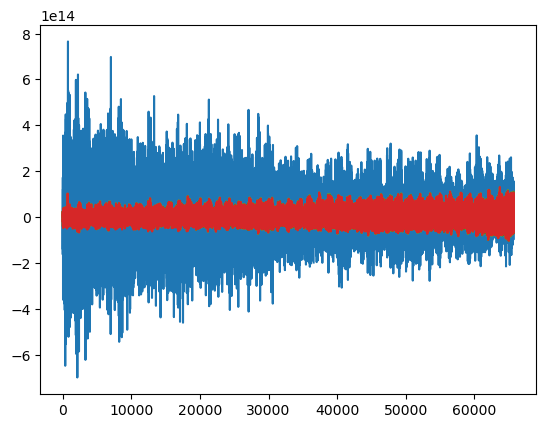

In [7]:
plt.plot(mass_residual_mlevel)
plt.plot(mass_residual_025_full)
plt.plot(mass_residual_full)
plt.plot(mass_residual_approx)

(-500000000000000.0, 500000000000000.0)

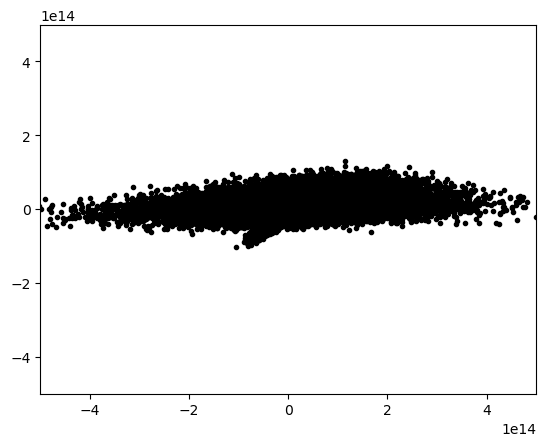

In [32]:
plt.plot(mass_residual_mlevel, mass_residual_approx, 'k.')
plt.ylim([-5e14, 5e14])
plt.xlim([-5e14, 5e14])

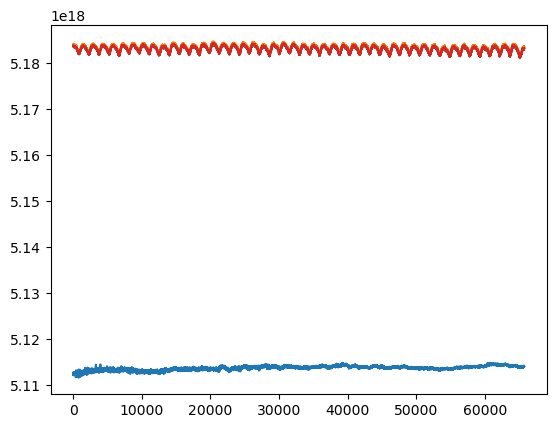

In [27]:
plt.plot(mass_val_mlevel)
plt.plot(mass_val_025_full)
plt.plot(mass_val_full)
plt.plot(mass_val_approx)

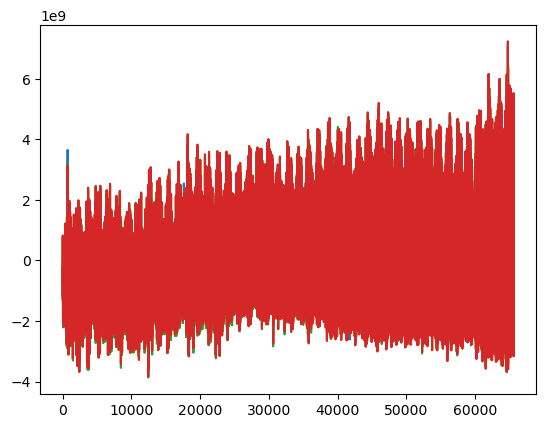

In [10]:
plt.plot(water_residual_mlevel)
plt.plot(water_residual_full)
plt.plot(water_residual_approx)
plt.plot(water_residual_025_full)

(-4000000000.0, 6000000000.0)

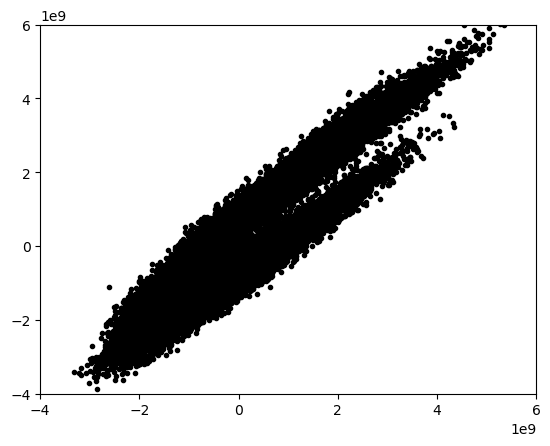

In [24]:
plt.plot(water_residual_mlevel, water_residual_approx, 'k.')
plt.ylim([-4e9, 6e9])
plt.xlim([-4e9, 6e9])

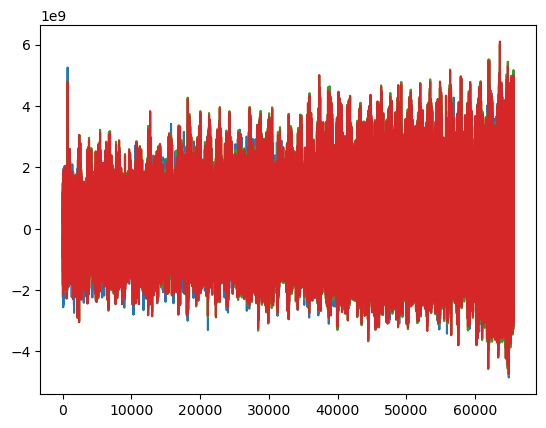

In [29]:
plt.plot(water_val_mlevel)
plt.plot(water_val_025_full)
plt.plot(water_val_full)
plt.plot(water_val_approx)

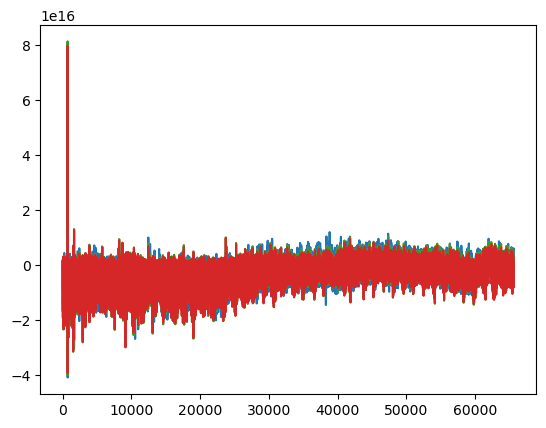

In [13]:
plt.plot(energy_residual_mlevel)
plt.plot(energy_residual_025_full)
plt.plot(energy_residual_full)
plt.plot(energy_residual_approx)

(-2.5e+16, 2e+16)

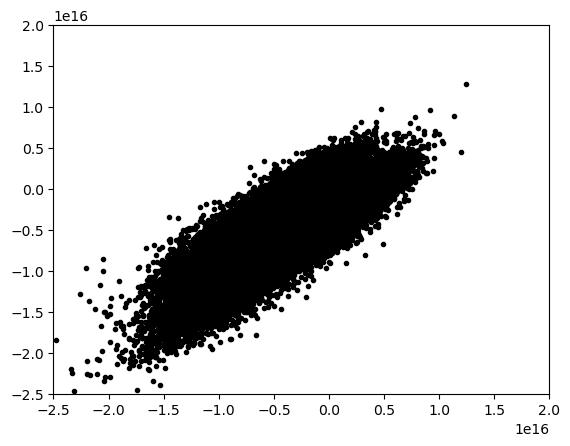

In [21]:
plt.plot(energy_residual_mlevel, energy_residual_approx, 'k.')
plt.ylim([-2.5e16, 2e16])
plt.xlim([-2.5e16, 2e16])

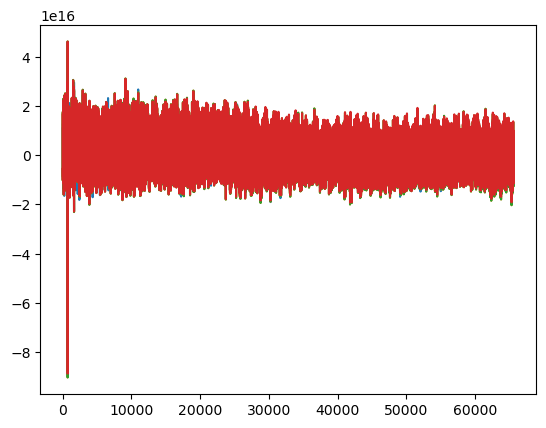

In [15]:
plt.plot(energy_val_mlevel)
plt.plot(energy_val_025_full)
plt.plot(energy_val_full)
plt.plot(energy_val_approx)